In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import gzip, os
import numpy as np
from scipy.stats import multivariate_normal
import sys

In [2]:
if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [3]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [4]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [5]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

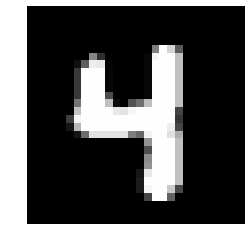

In [6]:
displaychar(train_data[58])

In [7]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

In [15]:
def fit_generative_model(x,y):
    k = 10  # labels 0,1,...,k-1
    d = (x.shape)[1]  # number of features
    mu = np.zeros((k,d))
    sigma = np.zeros((k,d,d))
    pi = np.zeros(k)
    for label in range(k):
        indices = (y == label)
        mu[label] = np.mean(x[indices,:], axis=0)
        sigma[label] = np.cov(x[indices,:], rowvar=0, bias=1)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, sigma, pi

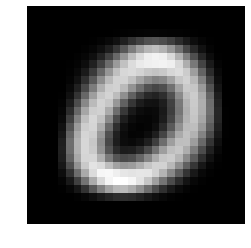

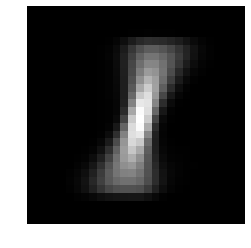

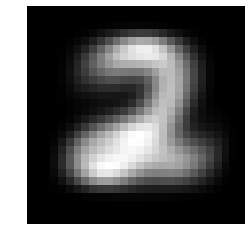

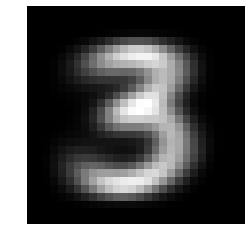

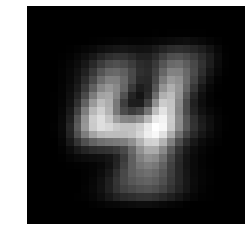

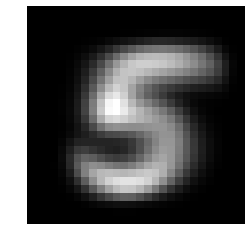

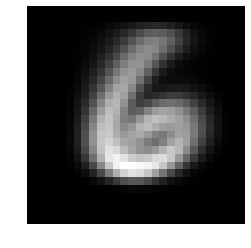

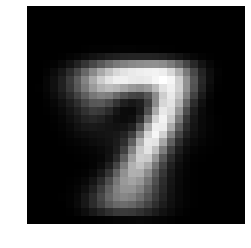

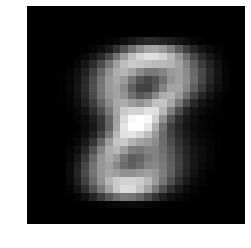

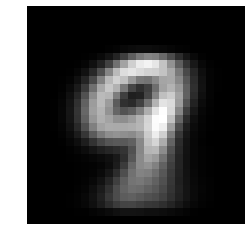

(10, 784, 784)

In [16]:

mu, sigma, pi = fit_generative_model(train_data, train_labels)
for i in range(10):
    displaychar(mu[i])
sigma.shape

In [17]:

# Compute log Pr(label|image) for each [test image,label] pair.
ae=[]
for c in [4000,1e9]:
    k=10
    score = np.zeros((len(test_labels),k))
    for label in range(0,k):
        rv = multivariate_normal(mean=mu[label], cov=sigma[label]+c*np.eye(784))
        for i in range(0,len(test_labels)):
           score[i,label] = np.log(pi[label]) + rv.logpdf(test_data[i,:])
    predictions = np.argmax(score, axis=1)
    # Finally, tally up score
    errors = np.sum(predictions != test_labels)
    ae.append(errors)
    print(c,"Your model makes " + str(errors) + " errors out of 10000")
print(ae)

4000 Your model makes 431 errors out of 10000
1000000000.0 Your model makes 8865 errors out of 10000
[431, 8865]
